# 🧠 Phishing Detection: Model Training Notebook


This notebook is for training three ML models for phishing detection:
- Logistic Regression
- Random Forest
- XGBoost

It focuses on:
- Loading and preparing the dataset
- Training the models on the training set
- Printing training accuracy to confirm learning
Note: This notebook is not for evaluation on unseen data.
    

In [5]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
    

## 📥 Load and Prepare Training Data

In [6]:

# Load the phishing dataset
df = pd.read_csv("../data/phishing.csv")
X = df.drop("Result", axis=1)
y = df["Result"]

# Fix labels: convert -1 to 0
y = y.replace(-1, 0)

# Train-test split (only using training part for this notebook)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 🧠 Train Models and Show Training Accuracy

In [10]:

# Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
acc_lr = accuracy_score(y_train, model_lr.predict(X_train))
print(f"Logistic Regression Training Accuracy: {acc_lr:.3f}")

# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
acc_rf = accuracy_score(y_train, model_rf.predict(X_train))
print(f"Random Forest Training Accuracy: {acc_rf:.3f}")

# XGBoost
#model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb = XGBClassifier(eval_metric='logloss')
model_xgb.fit(X_train, y_train)
acc_xgb = accuracy_score(y_train, model_xgb.predict(X_train))
print(f"XGBoost Training Accuracy: {acc_xgb:.3f}")


Logistic Regression Training Accuracy: 0.931
Random Forest Training Accuracy: 0.991
XGBoost Training Accuracy: 0.987



### 📌 Summary

This notebook demonstrates successful training of three models using the training set.
You may proceed to test these models on unseen data using a separate evaluation notebook.


## 📊 Visualize Training Accuracy

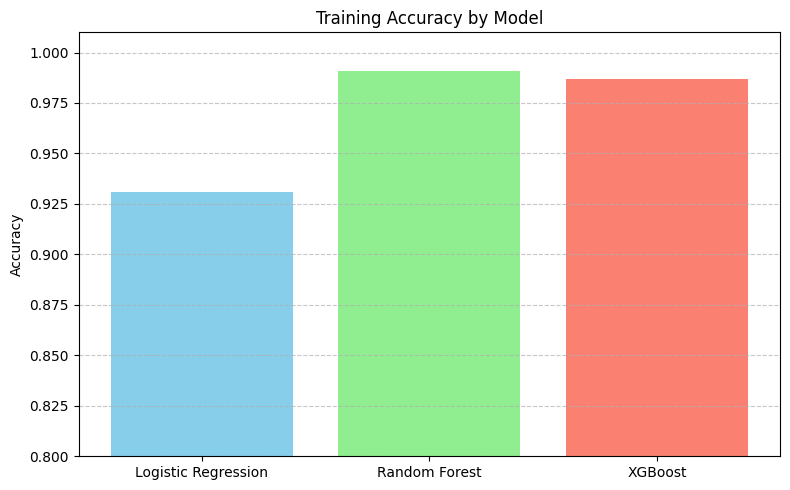

In [11]:

import matplotlib.pyplot as plt

# Store training accuracy in a dictionary
training_accuracies = {
    "Logistic Regression": acc_lr,
    "Random Forest": acc_rf,
    "XGBoost": acc_xgb
}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(training_accuracies.keys(), training_accuracies.values(), color=["skyblue", "lightgreen", "salmon"])
plt.title("Training Accuracy by Model")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.01)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
